In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


In [2]:
import random

input = []
output = []

for i in range(10000):
    x1 = int(random.random()*100)
    x2 = int(random.random()*100)
    input.append([x1, x2])
    output.append([x1+x2])
    
print("i:", input[100], "o:", output[100])

i: [88, 57] o: [145]


In [3]:
features = np.array(input, "float32")
labels = np.array(output, "float32")

print(features.shape)
print(labels.shape)

(10000, 2)
(10000, 1)


In [4]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu')) #input 차원2개(첫번째 히든레이어에만 기재가)
model.add(Dense(1, activation='relu')) #뎃셈일때는 -값이 불필요하기에 relu(0~1)사
model.summary()

W0620 01:53:47.566049 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 01:53:47.614151 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 01:53:47.620379 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])


W0620 01:53:50.332860 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
#batch_size=100 -> 한번에 수행할 입력data 갯수
#validation_split=0.1 -> epoch당 10%만 검증(테스트)

##history = model.fit(
##  features, labels, epochs=100, verbose=2, validation_split=0.1, shuffle=True
##)

history = model.fit(
    features,
    labels,
    epochs=100,
    verbose=2,
    validation_split=0.1,
    shuffle=True
)

W0620 01:53:53.001880 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0620 01:53:53.065227 139865222481792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 9000 samples, validate on 1000 samples
Epoch 1/100
 - 5s - loss: 85.7371 - acc: 0.0000e+00 - val_loss: 63.8925 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 36.3660 - acc: 0.0099 - val_loss: 19.5896 - val_acc: 0.0230
Epoch 3/100
 - 1s - loss: 11.5870 - acc: 0.0483 - val_loss: 5.4853 - val_acc: 0.1260
Epoch 4/100
 - 1s - loss: 2.8171 - acc: 0.4461 - val_loss: 1.5143 - val_acc: 0.4800
Epoch 5/100
 - 1s - loss: 0.9502 - acc: 0.6501 - val_loss: 0.6056 - val_acc: 0.7560
Epoch 6/100
 - 1s - loss: 0.3517 - acc: 0.9043 - val_loss: 0.2815 - val_acc: 0.9550
Epoch 7/100
 - 1s - loss: 0.1337 - acc: 0.9712 - val_loss: 0.0668 - val_acc: 0.9730
Epoch 8/100
 - 1s - loss: 0.0974 - acc: 0.9818 - val_loss: 0.0973 - val_acc: 0.9770
Epoch 9/100
 - 1s - loss: 0.0574 - acc: 0.9883 - val_loss: 0.0585 - val_acc: 0.9830
Epoch 10/100
 - 1s - loss: 0.0440 - acc: 0.9913 - val_loss: 0.0788 - val_acc: 0.9890
Epoch 11/100
 - 1s - loss: 0.0495 - acc: 0.9936 - val_loss: 0.0756 - val_acc: 0.9940
Epoch 12/100


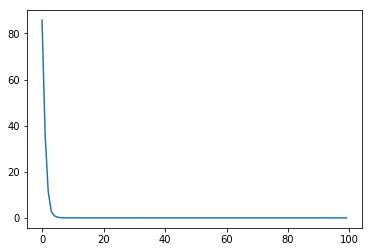

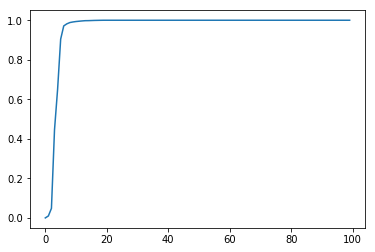

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['acc'])
plt.show()

In [12]:
print(model.predict(np.array([[100,100], [1,2]])))

[[200.11545  ]
 [  3.0004573]]
